## Visualización de datos
### Exploración de datos sobre el clima de zonas argentinas de 1991 a 2020

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Carga de datos

In [4]:
data = pd.read_csv(r'C:\Users\icrui\Documents\DS-ML\proy_etl_clim_arg\data\df_climas_arg.csv')
data.head()

,estacion,mes,provincia,precipi_mm,frec_dias_precipi_sup_1mm,humedad_relac,nubosidad_octas,temperat_c,temperat_max_c,temperat_min_c,veloc_kmh_viento_2011_2020,altura_m,latitud,longitud
0,SALTA AERO,Abr,SALTA,42.1,4.4,82.3,5.4,16.8,22.9,12.2,6.0,1221,-23.166667,-64.533333
1,SALTA AERO,Ago,SALTA,2.3,0.7,60.4,2.9,12.8,22.7,4.8,6.9,1221,-23.166667,-64.533333
2,SALTA AERO,Dic,SALTA,138.4,10.1,71.5,5.3,21.7,28.4,16.0,7.6,1221,-23.166667,-64.533333
3,SALTA AERO,Ene,SALTA,197.1,12.4,77.2,5.8,21.5,27.7,16.8,6.8,1221,-23.166667,-64.533333
4,SALTA AERO,Feb,SALTA,147.3,11.2,80.6,5.8,20.6,26.5,16.1,6.4,1221,-23.166667,-64.533333


Visualizaciones generales de los datos cuantitativos

In [7]:
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
estaciones = list(data['estacion'].unique())
provincias = list(data['provincia'].unique())

In [8]:
precip_mes = data.groupby('mes')['precipi_mm'].sum()
precip_mes = pd.DataFrame(precip_mes)

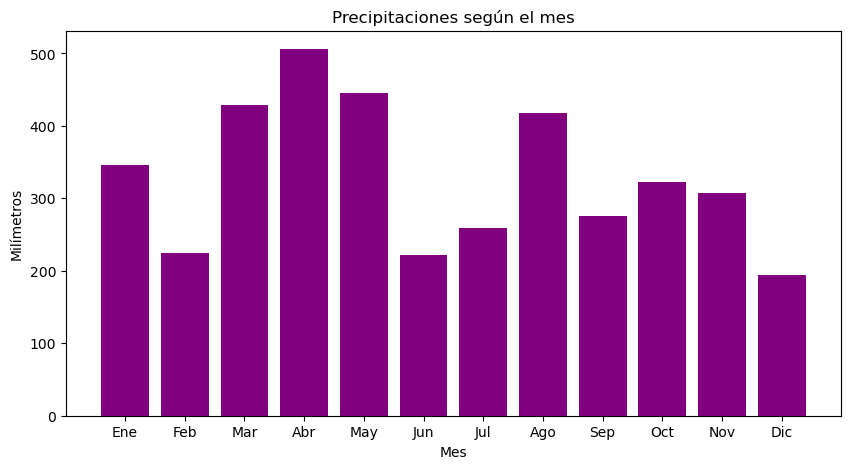

In [9]:
plt.figure(figsize=(10,5))
plt.bar(meses, precip_mes['precipi_mm'], color='purple')
plt.title('Precipitaciones según el mes')
plt.xlabel('Mes')
plt.ylabel('Milímetros')
plt.show()

**Interpretación:**
Desde 1991 y 2020, el mes que más se destacó por la cantidad de precipitaciones es abril con un poco más de 500 mm. Sin embargo, podría decirse que es el valor más alto dentro de la temporada de otoño, seguido por mayo y marzo, respectivamente.
Por otro lado, los meses con menos precipitaciones son febrero, junio y diciembre. En este caso no son meses que compartan la misma estación, por lo que no se ve el mismo patrón que el caso anterior.

In [12]:
prom_temp_max_mes = data.groupby('mes')['temperat_max_c'].mean()

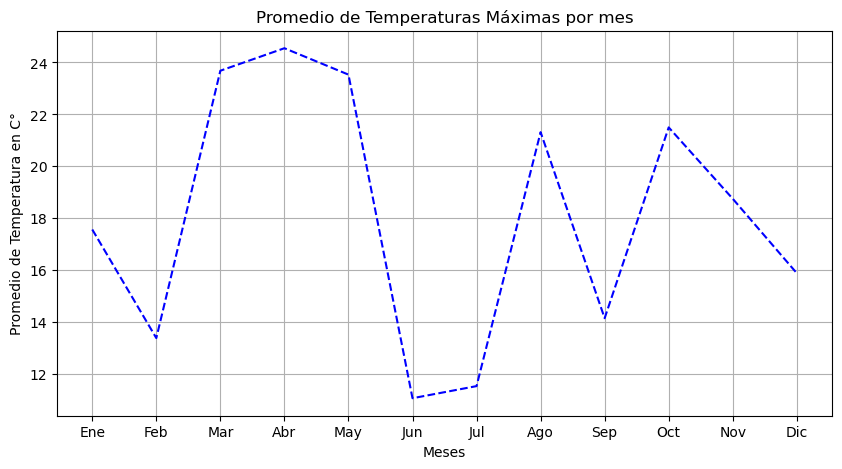

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(meses, prom_temp_max_mes, color='blue', linestyle='--')
plt.title('Promedio de Temperaturas Máximas por mes')
plt.xlabel('Meses')
plt.ylabel('Promedio de Temperatura en C°')
plt.grid(True)
plt.show()

**Interpretación:**
Si se contrastan el gráfico anterior y el actual, parece haber una relación directa entre las precipitaciones y el promedio de temperaturas máximas por mes. Al menos en esta ocasión, marzo, abril y mayo vuelven a destacarse como los que demuestran más temperatura máxima. Resulta interesante ver si es algo si se nota en todo el país o si este resultado está influenciado por alguna zona geográgica en particular.

In [16]:
temp_max_otono = data[['provincia', 'mes', 'temperat_max_c']]
temp_max_otono = temp_max_otono[temp_max_otono['mes'].isin(['Mar', 'Abr', 'May'])]

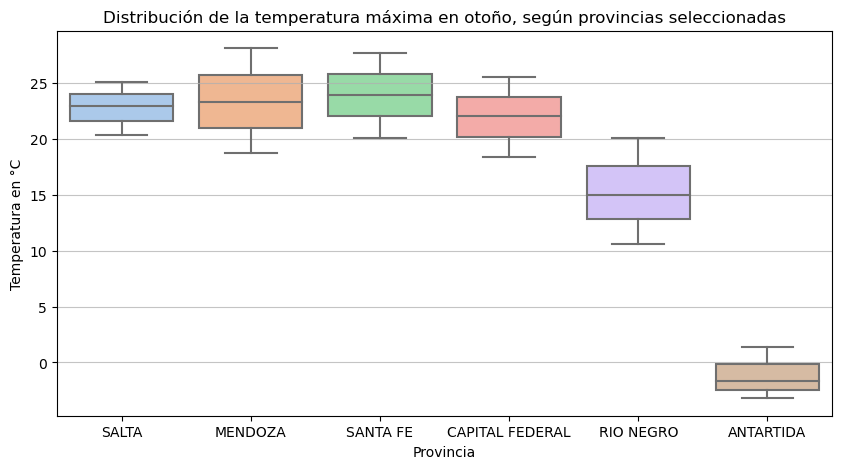

In [17]:
plt.figure(figsize=(10,5))
sns.boxplot(x='provincia', y='temperat_max_c', data=temp_max_otono, palette='pastel')
plt.title('Distribución de la temperatura máxima en otoño, según provincias seleccionadas')
plt.xlabel('Provincia')
plt.ylabel('Temperatura en °C')
plt.grid(axis='y', alpha=0.75)
plt.show()

**Interpretación:**
De las seis zonas seleccionadas para este análisis, al menos cuatro ubican su distribución (exactamente, su rango intercuartílico) de temperaturas máximas dentro del rango de apróx. 20 a 27 °C. Cabe destacar que la provincia que menos variabilidad tiene es Salta y la que más tiene es Mendoza. Asimismo, Santa y Buenos Aires tienen rangos similares aunque la primera es la que presenta temperaturas superiores. Por otro lado, vemos que Río Negro y la Antártida son las zonas que menos valores máximos presentan.

Teniendo en cuenta lo visto, esto demuestra que los valores vistos en el gráfico anterior no está influenciado por una zona en particular sino que es algo que se nota en la mayor parte de valores incluidos en este análisis.

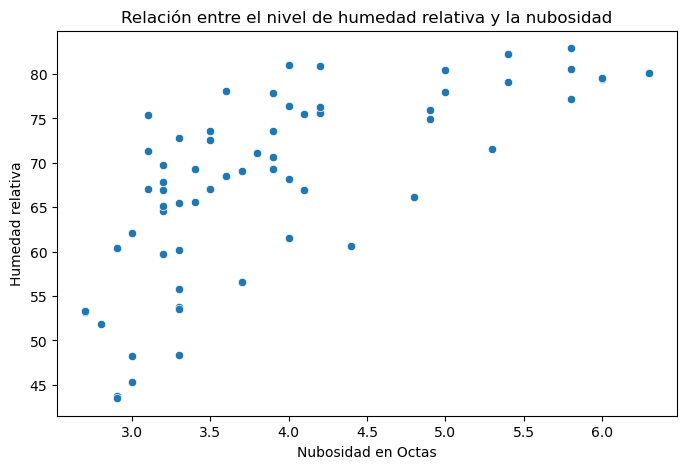

In [19]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data,
                x='nubosidad_octas',
                y='humedad_relac')
plt.title('Relación entre el nivel de humedad relativa y la nubosidad')
plt.xlabel('Nubosidad en Octas')
plt.ylabel('Humedad relativa')
plt.show()

**Interpretación:**
En este análisis se puede notar una relación positiva entre la nubosidad y la humedad. Si bien no es una relación estrictamente lineal, se destaca que cuanto más crece la nubosidad, crece la humedad. Este tipo de relaciones serán evaluadas más adelante para futuros modelos predictivos.

### Modelo de regresión lineal múltiple

Se chequea la relación entre las variables consideradas más importantes.

Text(0.5, 1.0, 'Correlación entre variables candidatas para un modelo predictivo')

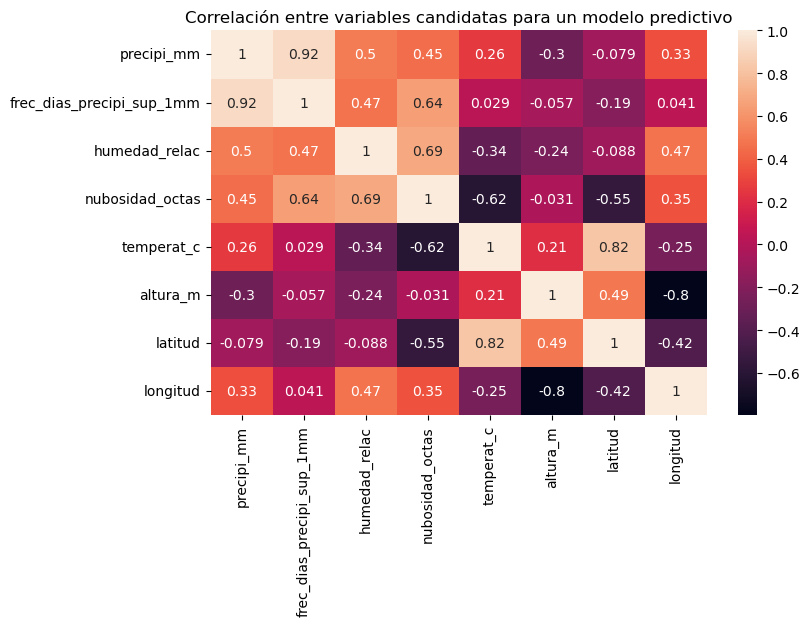

In [57]:
plt.figure(figsize=(8,5))
sns.heatmap(data[['precipi_mm', 'frec_dias_precipi_sup_1mm', 'humedad_relac',
                  'nubosidad_octas', 'temperat_c',
                  'altura_m', 'latitud', 'longitud']].corr(), annot=True)
plt.title('Correlación entre variables candidatas para un modelo predictivo')
# Se descarta veloc_kmh_viento_2011_2020 por registrar un plazo de tiempo más breve que los demas
# Se descarta temperat_max y min por estar muy relacionada a temperat_c que apunta a ser la variable Y